In [2]:
import pandas.util.testing as tm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """Entry point for launching an IPython kernel.


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/CS559/iris.csv')

In [5]:
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


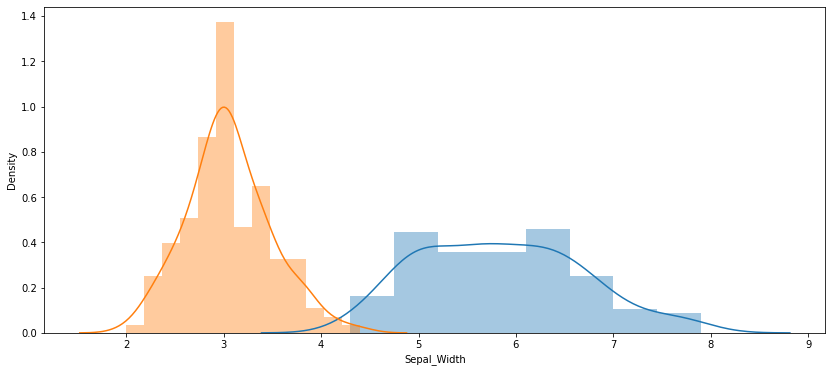

In [7]:
#Visualizing training features
plt.figure(figsize=(14, 6))
sns.distplot(df.Sepal_Length,hist=True)
sns.distplot(df.Sepal_Width,hist=True)

# distribution looks normal no need to normalize 

In [8]:
# Replace all instances of Iris-setosa and Iris-versicolor with Non-virginica
df.loc[(df.Species == 'Iris-setosa'),'Species'] = 0
df.loc[(df.Species == 'Iris-versicolor'),'Species'] = 0
df.loc[(df.Species == 'Iris-virginica'),'Species'] = 1

In [9]:
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df.Species.unique()

array([0, 1], dtype=object)

In [11]:
# Adding fixed Bias of 1.0
df['Bias'] = 1.0

In [12]:
# Adjusting col positions
df = df[['Bias', 'Sepal_Length', 'Sepal_Width', 'Species']]
df

,Bias,Sepal_Length,Sepal_Width,Species
0,1.0,5.1,3.5,0
1,1.0,4.9,3.0,0
2,1.0,4.7,3.2,0
3,1.0,4.6,3.1,0
4,1.0,5.0,3.6,0
...,...,...,...,...
145,1.0,6.7,3.0,1
146,1.0,6.3,2.5,1
147,1.0,6.5,3.0,1
148,1.0,6.2,3.4,1


In [13]:
# Spliting data for model training and testing
train_df, test_df = train_test_split(df, test_size = 0.3)

In [14]:
target_df = train_df.Species
target_test_df = test_df.Species
target_df.head()

45     0
108    1
123    1
101    1
128    1
Name: Species, dtype: object

In [15]:
train_df.drop(['Species'],axis=1,inplace=True)
test_df.drop(['Species'],axis=1,inplace=True)
train_df.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Bias,Sepal_Length,Sepal_Width
45,1.0,4.8,3.0
108,1.0,6.7,2.5
123,1.0,6.3,2.7
101,1.0,5.8,2.7
128,1.0,6.4,2.8


In [16]:
print(train_df.shape + test_df.shape)

(105, 3, 45, 3)


In [17]:
train_df.head()

,Bias,Sepal_Length,Sepal_Width
45,1.0,4.8,3.0
108,1.0,6.7,2.5
123,1.0,6.3,2.7
101,1.0,5.8,2.7
128,1.0,6.4,2.8


In [18]:
def sigmoid(data_train,theta):
    sig = 1 / (1 + np.exp(-np.dot(theta, data_train.T)))
    return sig

In [19]:
def gradientDescent(train_df,target_df,theta):
  t1 = sigmoid(train_df,theta)
  t2 = target_df - (t1.T)
  grad = np.dot(train_df.T, t2)
  return grad

In [20]:
def new_theta(grad,learningRate,theta):
  update_theta = np.multiply(grad,learningRate)
  new_th = np.add(theta, updated_theta)
  return new_th

In [21]:
def log_likelyhood(train_df,target_df,updated_theta):
  tmp = train_df.shape[0]
  sig_tmp = sigmoid(train_df,updated_theta)
  ll=np.dot((-1 / tmp) ,np.add(np.dot(target_df,np.log(sig_tmp)),np.dot(np.subtract(1,target_df),np.log(np.subtract(1,sig_tmp)))))
  return ll

In [22]:
updated_theta = [0,0,0]
learningRate = 0.01
itr = 5000
l_likelyhood = np.zeros(itr)
itrr = []
lk=[]

for i in range (itr):
  itrr.append(itr)
  grd = gradientDescent(train_df,target_df,updated_theta)
  updated_theta = new_theta(grd,learningRate,updated_theta)
  ll=log_likelyhood(train_df,target_df,updated_theta)
  lk.append(l_likelyhood)

KeyboardInterrupt: ignored

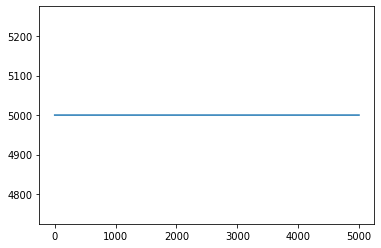

In [33]:
sns.lineplot(data=itrr)
sns.lineplot(data=lk)

In [23]:
def pred(test_df,updated_theta):
  predict = sigmoid(test_df,updated_theta)
  for i in range(len(predict)):
        if(predict[i]>=0.5):
            predict[i]=1
        else:
            predict[i]=0
  print("Predicted Values",predict)
  return predict

In [24]:
predd = pred(test_df,updated_theta)
print(predd)

Predicted Values [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


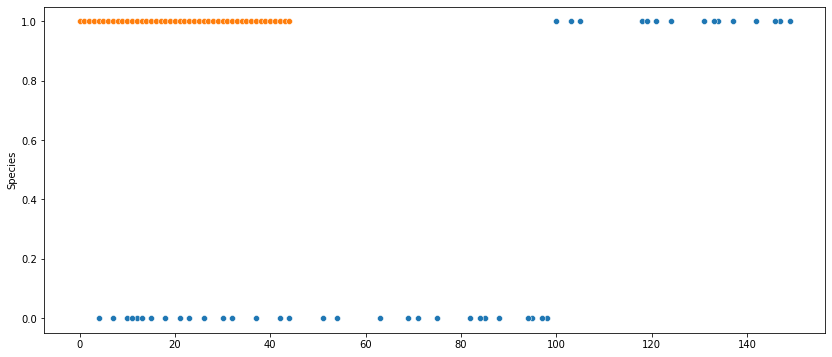

In [35]:
plt.figure(figsize=(14, 6))
sns.scatterplot(data=target_test_df)
sns.color_palette("flare", as_cmap=True)
sns.scatterplot(data=predd)

In [82]:
acc = sum(predd - target_test_df) / 100
acc

0.3